In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [122]:
dfs = pd.read_csv("quitSmokingState.csv.txt")
dfc = pd.read_csv("deathRatesStates.csv.txt")

#22/50 states
states = [0, 1, 2, 3, 4, 8, 10, 11, 13, 14, 15, 16, 17, 19, 20, 23, 24, 25, 26, 27, 34, 35, 38, 39, 40, 41, 42, 44, 46, 47, 48, 50]
remove = []
for i in range(50):
    if((i in states) == False):
        remove.append(i)
dfs_states = dfs.drop(remove, axis = 0)
dfc_states = dfc.drop(remove, axis = 0)

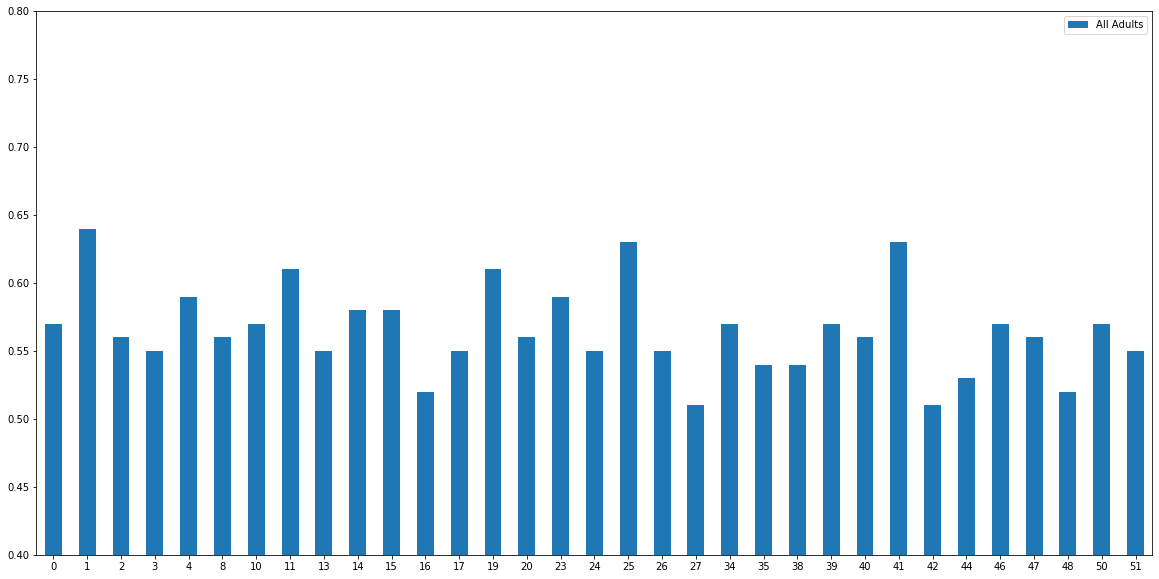

In [123]:
ax = dfs_states.plot.bar(y="All Adults", rot=0, figsize=(20,10), ylim = (0.4, .8))

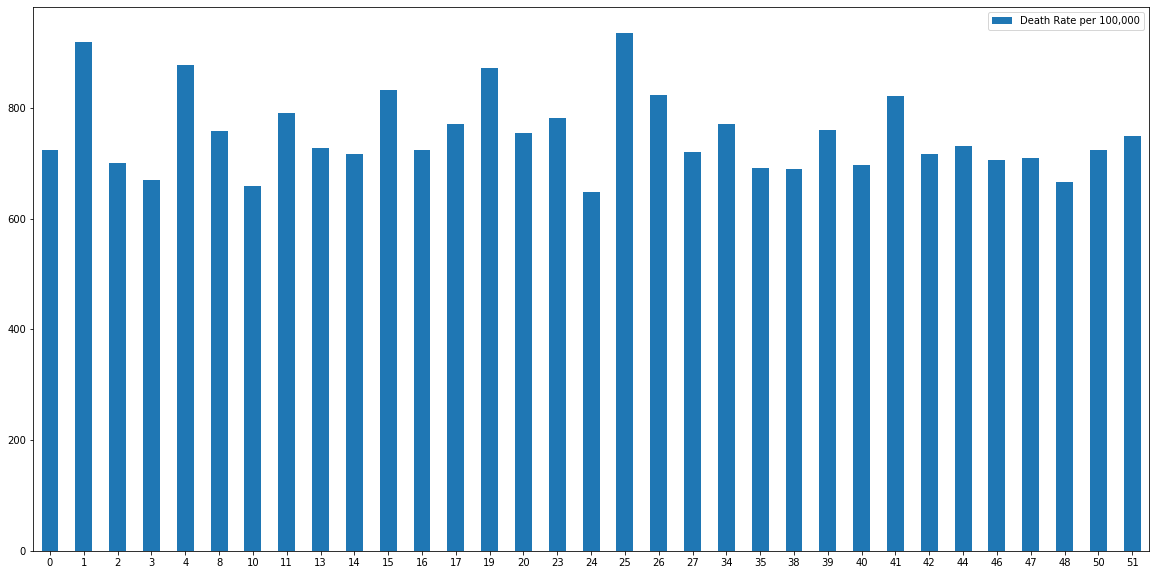

In [124]:
ax = dfc_states.plot.bar(y='Death Rate per 100,000', rot=0, figsize=(20,10))

In [125]:
dfs_states["COVID Death Rate"] = dfc_states["Death Rate per 100,000"]

In [126]:
dfs_states.head()

,Location,All Adults,Non-Hispanic White,Non-Hispanic Black,Hispanic,Asian and Native Hawaiian or Pacific Islander,American Indian/ Alaska Native,Other,Footnotes,COVID Death Rate
0,United States,0.57,0.54,0.69,0.60,0.67,0.51,0.58,1.0,723.6
1,Alabama,0.64,0.63,0.71,NSD,NSD,0.49,0.71,NaN,918.1
2,Alaska,0.56,0.55,0.58,NSD,NSD,0.59,0.64,NaN,700.3
3,Arizona,0.55,0.47,0.66,0.65,0.83,0.51,0.53,NaN,669.2
4,Arkansas,0.59,0.57,0.70,0.59,NSD,0.64,0.60,NaN,876.6


In [127]:
dfs_states = dfs_states.drop(columns = ["Non-Hispanic White", "Non-Hispanic Black", "Hispanic", "Asian and Native Hawaiian or Pacific Islander", "American Indian/ Alaska Native", "Other", "Footnotes"])

In [128]:
dfs_states.head()

,Location,All Adults,COVID Death Rate
0,United States,0.57,723.6
1,Alabama,0.64,918.1
2,Alaska,0.56,700.3
3,Arizona,0.55,669.2
4,Arkansas,0.59,876.6


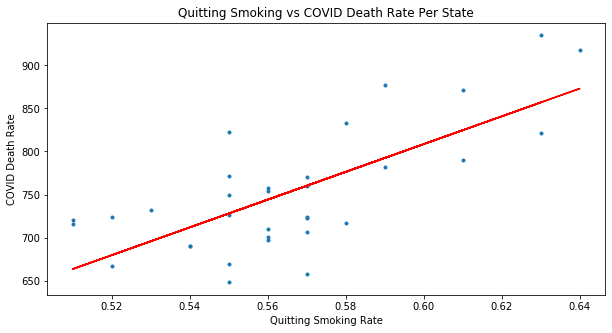

In [129]:
plt.figure(figsize=(10,5))
plt.plot(dfs_states["All Adults"], dfc_states["Death Rate per 100,000"], ".")
plt.title("Quitting Smoking vs COVID Death Rate Per State")
plt.xlabel("Quitting Smoking Rate")
plt.ylabel("COVID Death Rate")

linear_regressor = LinearRegression()
linear_regressor.fit(dfs_states["All Adults"].values.reshape(-1, 1), dfc_states["Death Rate per 100,000"].values.reshape(-1, 1))
Y_pred = linear_regressor.predict(dfs_states["All Adults"].values.reshape(-1, 1))

plt.plot(dfs_states["All Adults"].values.reshape(-1, 1), Y_pred, color='red')
plt.show()